In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
Orig_df = pd.read_csv('train.csv')
AV_test_df = pd.read_csv('test.csv')

## Dropping ID columns

In [3]:
Orig_df.drop(columns=['ID'],inplace=True)
result = AV_test_df['ID']
AV_test_df.drop(columns=['ID'],inplace=True)

In [4]:
Orig_df.isna().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [5]:
AV_test_df.isna().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

We will use KNNimputer now to impute the missing values here

In [6]:
from sklearn.impute import KNNImputer

In [7]:
imputer = KNNImputer(n_neighbors=3)

In [11]:
Orig_df_filled = pd.DataFrame(imputer.fit_transform(Orig_df),columns=Orig_df.columns)

In [12]:
AV_test_df_filled = pd.DataFrame(imputer.fit_transform(AV_test_df),columns=AV_test_df.columns)

In [13]:
Orig_df_filled.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [14]:
AV_test_df_filled.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [16]:
Orig_df_filled.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [17]:
AV_test_df_filled.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
1,410.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
2,626.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,731.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,789.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
Orig_df_filled.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [24]:
X = Orig_df_filled[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']]
y = Orig_df_filled['Crop_Damage']

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.fit_transform(X_test)

## Baseline Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [30]:
classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=0),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
    "XGBClassifier":XGBClassifier(random_state=0)
    }

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [32]:
my_metrics = pd.DataFrame()
for key, classifier in classifiers.items():
    classifier.fit(X_train_scale,y_train)
    y_pred = classifier.predict(X_test_scale)
    testing_score = round(accuracy_score(y_test,y_pred),3)
    training_score = round(np.mean((cross_val_score(classifier, X_train_scale, y_train, cv=5))),3)
    print("Training Score for {model} is {train_score}".format(model=key,train_score=training_score))
    print("Testing Score for {model} is {test_score}".format(model=key,test_score=testing_score))
    fit = ""
    if training_score > testing_score:
        fit="Good Fit"
    else:
        fit="Overfit"
    metrics_dict = {}
    metrics_dict = {'Classifier':key,'Test Accuracy':testing_score,'Train Accuracy':training_score,'fit': fit}
    my_metrics = my_metrics.append(metrics_dict,ignore_index=True)

    

Training Score for LogisiticRegression is 0.834
Testing Score for LogisiticRegression is 0.832
Training Score for KNearest is 0.83
Testing Score for KNearest is 0.827
Training Score for Support Vector Classifier is 0.842
Testing Score for Support Vector Classifier is 0.84
Training Score for DecisionTreeClassifier is 0.754
Testing Score for DecisionTreeClassifier is 0.753
Training Score for Naive Bayes is 0.82
Testing Score for Naive Bayes is 0.822
Training Score for Random Forest Classifier is 0.829
Testing Score for Random Forest Classifier is 0.827
Training Score for GradientBoostingClassifier is 0.846
Testing Score for GradientBoostingClassifier is 0.844
Training Score for AdaBoostClassifier is 0.841
Testing Score for AdaBoostClassifier is 0.84
Training Score for XGBClassifier is 0.846
Testing Score for XGBClassifier is 0.848


In [33]:
 my_metrics

,Classifier,Test Accuracy,Train Accuracy,fit
0,LogisiticRegression,0.832,0.834,Good Fit
1,KNearest,0.827,0.830,Good Fit
2,Support Vector Classifier,0.840,0.842,Good Fit
3,DecisionTreeClassifier,0.753,0.754,Good Fit
4,Naive Bayes,0.822,0.820,Overfit
5,Random Forest Classifier,0.827,0.829,Good Fit
6,GradientBoostingClassifier,0.844,0.846,Good Fit
7,AdaBoostClassifier,0.840,0.841,Good Fit
8,XGBClassifier,0.848,0.846,Overfit


We see GradientBoostingClassifier and XGBClassifier are performing the best.

In [35]:
gb_clf = GradientBoostingClassifier()

In [42]:
params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400],'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,5,8,10,12],'max_leaf_nodes':[5,10,12,15,20],'max_features':np.arange(1,9)}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
rscv = RandomizedSearchCV(gb_clf,param_distributions=params,scoring='accuracy',cv=5)

In [45]:
rscv.fit(X_train_scale,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98]),
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'max_leaf_nodes': [5, 10, 12, 15, 20],
                                        'min_samples_leaf': [1, 5, 8, 10, 12],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy')

In [46]:
rscv.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features=8, max_leaf_nodes=20,
                           min_samples_leaf=10, n_estimators=200)

In [48]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 20,
 'max_features': 8,
 'max_depth': 5,
 'learning_rate': 0.1}

In [49]:
y_pred_gb = rscv.best_estimator_.predict(X_test_scale)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score = round(accuracy_score(y_test,y_pred_gb),3)
training_score = round(np.mean((cross_val_score(rscv.best_estimator_, X_train_scale, y_train, cv=5))),3)

In [51]:
print(training_score,testing_score)

0.847 0.848


In [52]:
AV_scale = std_scaler.fit_transform(AV_test_df_filled)

In [53]:
y_pred_res = rscv.best_estimator_.predict(AV_scale)

In [55]:
AV_test_df = pd.read_csv('test.csv')
result=AV_test_df[['ID']]
result['Crop_Damage'] = y_pred_res
result = result[['ID','Crop_Damage']]

In [58]:
result.to_csv('AV_Agri_GB1.csv',index=False)

## After this will do some feature engineering

In [59]:
Orig_df_filled.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


<AxesSubplot:>

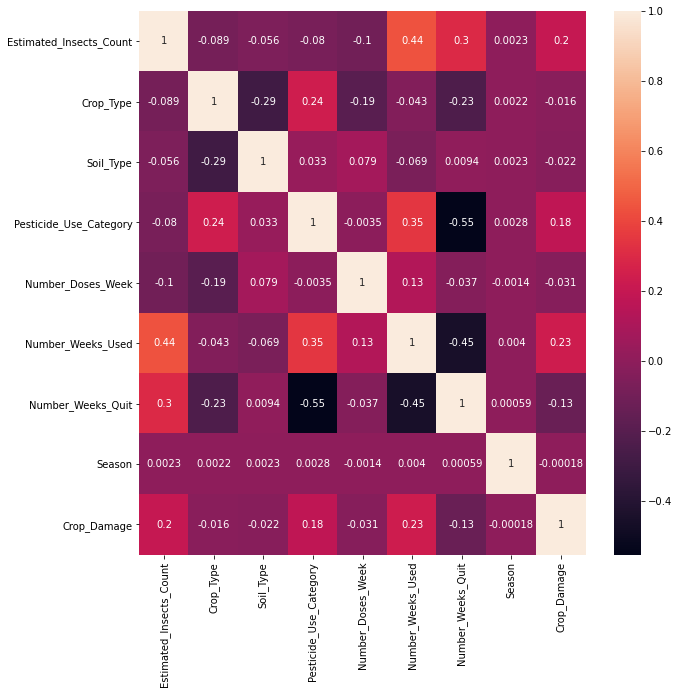

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(Orig_df_filled.corr(),annot=True)

In [63]:
Orig_df_filled.Soil_Type.value_counts()

0.0    48124
1.0    40734
Name: Soil_Type, dtype: int64

In [64]:
Orig_df_filled.Crop_Type.value_counts()

0.0    63589
1.0    25269
Name: Crop_Type, dtype: int64

In [65]:
Orig_df_filled.Pesticide_Use_Category.value_counts()

2.0    63709
3.0    24312
1.0      837
Name: Pesticide_Use_Category, dtype: int64

In [66]:
Orig_df_filled.Season.value_counts()

2.0    44210
1.0    26902
3.0    17746
Name: Season, dtype: int64

> - Estimated_Insects_Count => no change just scaling
> - Crop_Type => only in 0,1 and doesnot have much correlation with Crop Damage
> - Soil_Type => only in 0,1 and doesnot have much correlation with Crop Damage
> - Pesticide_Use_Category => 1 has less values can merge it to 2 assuming previously used is equivalent to Never
> - Season => 1,2,3 has less correlation with crop damage


## Dropping 3 columns : Season,Crop_Type,Soil_Type

In [68]:
Orig_df_filled_FE = Orig_df_filled.drop(columns=['Crop_Type','Soil_Type','Season'])
AV_test_df_filled_FE = AV_test_df_filled.drop(columns=['Crop_Type','Soil_Type','Season'])

In [70]:
X1 = Orig_df_filled_FE[['Estimated_Insects_Count',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit']]
y1 = Orig_df_filled_FE['Crop_Damage']

In [71]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=0,test_size=0.2)

In [72]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train1_scale = std_scaler.fit_transform(X_train1)
X_test1_scale = std_scaler.fit_transform(X_test1)

In [73]:
gb_clf1 = GradientBoostingClassifier()

params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400],'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,5,8,10,12],'max_leaf_nodes':[5,10,12,15,20],'max_features':np.arange(1,9)}

from sklearn.model_selection import RandomizedSearchCV

rscv1 = RandomizedSearchCV(gb_clf1,param_distributions=params,scoring='accuracy',cv=5)

rscv1.fit(X_train1_scale,y_train1)

rscv1.best_estimator_

rscv1.best_params_

y_pred_gb1 = rscv1.best_estimator_.predict(X_test1_scale)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score1 = round(accuracy_score(y_test1,y_pred_gb1),3)
training_score1 = round(np.mean((cross_val_score(rscv1.best_estimator_, X_train1_scale, y_train1, cv=5))),3)

print(training_score1,testing_score1)

AV_scale_FE = std_scaler.fit_transform(AV_test_df_filled_FE)

y_pred_res1 = rscv1.best_estimator_.predict(AV_scale_FE)

AV_test_df = pd.read_csv('test.csv')
result1=AV_test_df[['ID']]
result1['Crop_Damage'] = y_pred_res1
result1 = result1[['ID','Crop_Damage']]

result1.to_csv('AV_Agri_GB_FE.csv',index=False)

0.845 0.847


## Pesticide_Use_Category merging 1 to 2

In [74]:
AV_test_df_filled_FE['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)
Orig_df_filled_FE['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)

In [75]:
X2 = Orig_df_filled_FE[['Estimated_Insects_Count',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit']]
y2 = Orig_df_filled_FE['Crop_Damage']

from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state=0,test_size=0.2)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train2_scale = std_scaler.fit_transform(X_train2)
X_test2_scale = std_scaler.fit_transform(X_test2)

gb_clf2 = GradientBoostingClassifier()

params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400],'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,5,8,10,12],'max_leaf_nodes':[5,10,12,15,20],'max_features':np.arange(1,9)}

from sklearn.model_selection import RandomizedSearchCV

rscv2 = RandomizedSearchCV(gb_clf2,param_distributions=params,scoring='accuracy',cv=5)

rscv2.fit(X_train2_scale,y_train2)

rscv2.best_estimator_

rscv2.best_params_

y_pred_gb2 = rscv2.best_estimator_.predict(X_test2_scale)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score1 = round(accuracy_score(y_test2,y_pred_gb2),3)
training_score1 = round(np.mean((cross_val_score(rscv2.best_estimator_, X_train2_scale, y_train2, cv=5))),3)



NameError: name 'training_score2' is not defined

In [76]:
print(training_score1,testing_score1)

AV_scale_FE2 = std_scaler.fit_transform(AV_test_df_filled_FE)

y_pred_res2 = rscv2.best_estimator_.predict(AV_scale_FE2)

AV_test_df = pd.read_csv('test.csv')
result1=AV_test_df[['ID']]
result1['Crop_Damage'] = y_pred_res2
result1 = result1[['ID','Crop_Damage']]

result1.to_csv('AV_Agri_GB_FE2.csv',index=False)

0.844 0.844


## As the 1st model gvae a good score will now try to fit the model to MLP

In [77]:
import sklearn.neural_network
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(100, ),(150, )],
    'activation': ['sigmoid','relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001],
    'learning_rate': ['constant','adaptive']
}

In [78]:
mlp_gs = sklearn.neural_network.MLPClassifier(max_iter=100)
rscv_ml = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
rscv_ml.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(100,), (150,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']})

In [80]:
y_pred_mlp = rscv_ml.predict(X_test_scale)
y_train_pred = rscv_ml.predict(X_train_scale)

accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_mlp)
accuracy_train = sklearn.metrics.accuracy_score(y_train, y_train_pred)

print(accuracy_test,accuracy_train)
y_pred_Av = rscv_ml.predict(AV_scale)

0.8470627954085078 0.8474664490898348


In [81]:
AV_test_df = pd.read_csv('test.csv')
result1=AV_test_df[['ID']]
result1['Crop_Damage'] = y_pred_Av
result1 = result1[['ID','Crop_Damage']]

result1.to_csv('AV_Agri_MLP_KNNimputer.csv',index=False)